# Individual Work - Stage I - Task 3
By Natalie Hildreth

#### I am working on the Employment dataset of the 2020 COVID-19 data instructed for us to evaluate. 
The data provided through the Employment excel spreadsheets are Year, Qtr, Area Type, St Name, Area Ownership, Industry, Annual Average Status Code, Annual Average Establishment Count, Annual Average Employment, Annual Total Wages, Annual Average Weekly Wage, Annual Average Pay, Employment Location Quotient Relative to U.S., and Total Wage Location Quotient Relative to U.S. 

This is a large number of variables present, so in order to evaluate the most relevant data type, I will be using Annual Average Employment.

The first portion of task 3 is to calculate COVID-19 data trends for the last week of the data. I have chosen New Jersey as my state to analyze.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load COVID-19 Super DataFrame
covid_dataframe = pd.read_csv('final_merged_data.csv')

# Filter data from NJ
nj_data = covid_dataframe[covid_dataframe['State'] == 'NJ']

case_columns = [col for col in nj_data.columns if col.endswith('_cases')]
deaths_columns = [col for col in nj_data.columns if col.endswith('_deaths')]
population_columns = [col for col in nj_data.columns if col.endswith('population')]

# Using the last 7 days of data for cases, deaths, and population
last_week_cases = case_columns[-7:]
last_week_deaths = deaths_columns[-7:]
last_week_population = population_columns[-7:]

# Creating a DataFrame with only the last 7 days worth of data
nj_last_week = nj_data[['countyFIPS', 'County Name', 'State'] + last_week_cases + last_week_deaths + last_week_population].copy()

# Calculating total cases, deaths, and population
nj_last_week.loc['total_cases_last_week'] = nj_last_week[last_week_cases].sum(axis=1)
nj_last_week.loc['total_deaths_last_week'] = nj_last_week[last_week_deaths].sum(axis=1)
nj_last_week.loc['total_population_last_week'] = nj_last_week[last_week_population].sum(axis=1)

daily_cases = nj_last_week[last_week_cases].sum(axis=0)
daily_deaths = nj_last_week[last_week_deaths].sum(axis=0)

# display the result
print(nj_last_week.head())

      countyFIPS         County Name State  2023-07-17_cases  \
1774     34001.0    Atlantic County     NJ           89852.0   
1775     34003.0      Bergen County     NJ          320734.0   
1776     34005.0  Burlington County     NJ          138798.0   
1777     34007.0      Camden County     NJ          166044.0   
1778     34009.0    Cape May County     NJ           29823.0   

      2023-07-18_cases  2023-07-19_cases  2023-07-20_cases  2023-07-21_cases  \
1774           89852.0           89852.0           89852.0           89852.0   
1775          320734.0          320734.0          320734.0          320734.0   
1776          138798.0          138798.0          138798.0          138798.0   
1777          166044.0          166044.0          166044.0          166044.0   
1778           29823.0           29823.0           29823.0           29823.0   

      2023-07-22_cases  2023-07-23_cases  2023-07-17_deaths  \
1774           89852.0           89852.0             1073.0   
1775    

##### Now, I will observe the data by plotting the cases, deaths, and population on a chart to determine the trends.

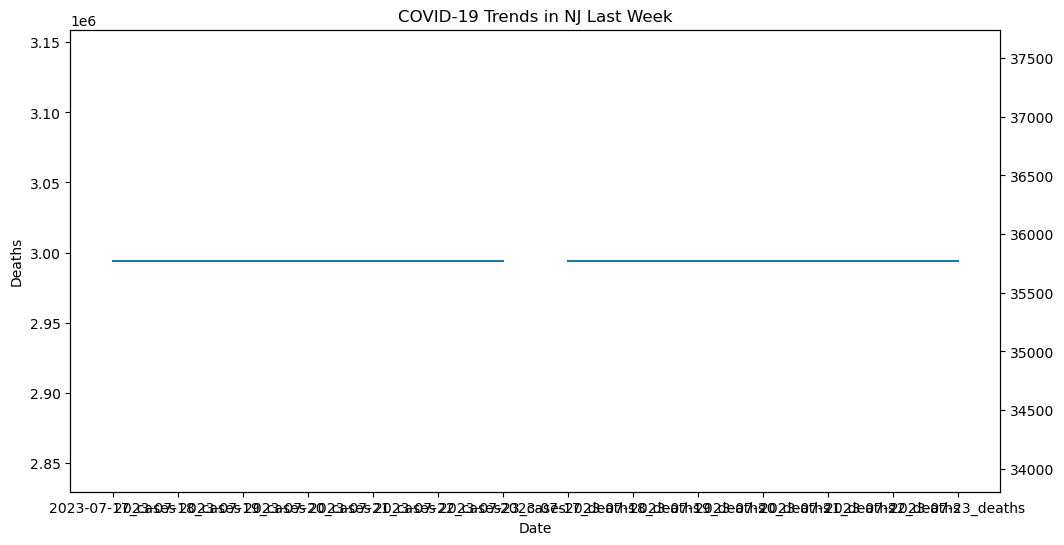

In [3]:
# create the plot
fig, ax1 = plt.subplots(figsize=(12,6))

# plotting the cases
ax1.plot(daily_cases.index, daily_cases.values, label='Daily Cases')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cases')
ax1.tick_params(axis='y')

# plotting the deaths
ax2 = ax1.twinx()
ax2.plot(daily_deaths.index, daily_deaths.values, label='Daily Deaths')
ax1.set_ylabel('Deaths')
ax1.tick_params(axis='y')

# displaying combined plots of both cases and deaths
plt.title('COVID-19 Trends in NJ Last Week')
plt.show()

##### As evident from the graph, within the last week of availabile data from New Jersey, there is no change in deaths or cases. This means all trends are stable.

Now, I will compare this data with the employment trends. My hypothesis is that the employment data will also be consistent with the COVID-19 trends of the last week of availible data from New Jersey. Both the employment and  COVID-Trends will remain consistent.

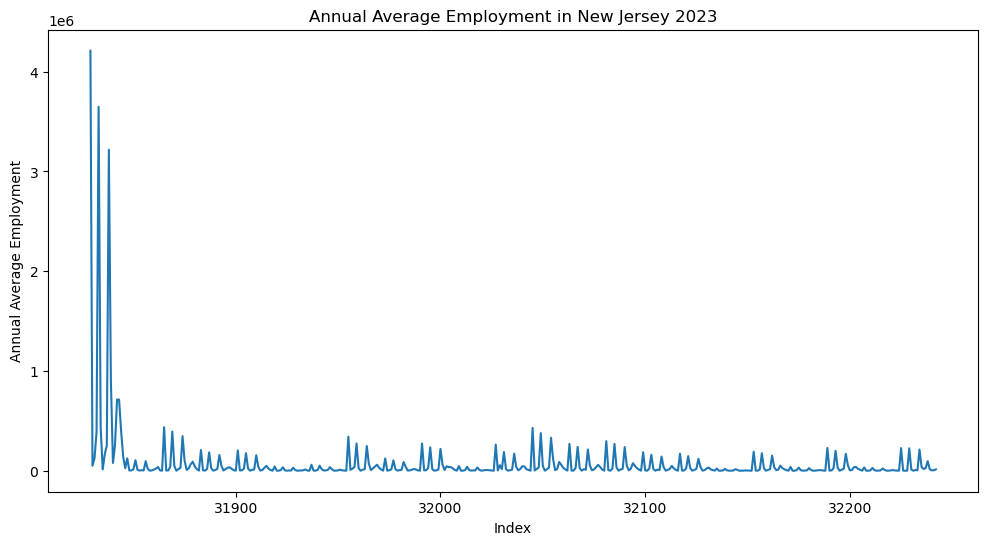

In [5]:
# load the employment data
employment_data = pd.read_excel('allhlcn23.xlsx')

# selecting the columns of Annual Average Employment
nj_employment_data = employment_data[employment_data['St Name'] == 'New Jersey']

# plot employment data
if 'Annual Average Employment' in nj_employment_data.columns:
    plt.figure(figsize=(12,6))
    plt.plot(nj_employment_data.index, nj_employment_data['Annual Average Employment'])
    plt.xlabel('Index')
    plt.ylabel('Annual Average Employment')
    plt.title('Annual Average Employment in New Jersey 2023')
    plt.show()

##### As shown in the graph above, when looking at the later half of the 2023 data for Annual Average Employment in New Jersey in 2023;

2023 is relevant as it is the same year that the last week of data is able to be found in Covid-19 trends for new Jersey.

This graph shows that the employment towards the later half of New Jersey in 2023 is also consistent. This means that both datasets are consistent, as predicted in my previous hypothesis.